<a href="https://colab.research.google.com/github/Nwosu-Ihueze/Football-Transfer/blob/main/Copy_of_Football.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis of Football Transfers Between 2000 - 2008

In football, once the transfer window opens, clubs starts bidding, buying, loaning, borrowing or selling their players. This transfers are done to get the 'best' players or sell the 'worst' players. 

Transfers are pretty expensive, so in this notebook, I would be doing an exploratory data analysis that answers these questions:


1. Which clubs are the top 10 selling clubs?

2. Which clubs are the top 10 buying clubs?

3. Which leagues are the top selling leagues?

4. Which leagues are the top buying leagues?

5. Does age determine the value of a player?

6. Which position is most sought for?

Importing libraries

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading CSV file

In [ ]:
'''Write a variable that stores the file name and opens the file and reads through it.
Using different commands, display overall and statistical information in file'''
df = pd.read_csv("/content/top250-00-19.csv") #Reading the csv file

Visualizing first five rows

In [ ]:

df.head() #First five columns in dataframe

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee
0,Luís Figo,Right Winger,27,FC Barcelona,LaLiga,Real Madrid,LaLiga,2000-2001,NaN,60000000
1,Hernán Crespo,Centre-Forward,25,Parma,Serie A,Lazio,Serie A,2000-2001,NaN,56810000
2,Marc Overmars,Left Winger,27,Arsenal,Premier League,FC Barcelona,LaLiga,2000-2001,NaN,40000000
3,Gabriel Batistuta,Centre-Forward,31,Fiorentina,Serie A,AS Roma,Serie A,2000-2001,NaN,36150000
4,Nicolas Anelka,Centre-Forward,21,Real Madrid,LaLiga,Paris SG,Ligue 1,2000-2001,NaN,34500000


## Preprocessing

Visualizing shape of dataset

In [ ]:

df.shape #The number of rows and columns

(4700, 10)

Visualizing dataset general information

In [ ]:

df.info()#General file information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4700 entries, 0 to 4699
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          4700 non-null   object 
 1   Position      4700 non-null   object 
 2   Age           4700 non-null   int64  
 3   Team_from     4700 non-null   object 
 4   League_from   4700 non-null   object 
 5   Team_to       4700 non-null   object 
 6   League_to     4700 non-null   object 
 7   Season        4700 non-null   object 
 8   Market_value  3440 non-null   float64
 9   Transfer_fee  4700 non-null   int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 367.3+ KB


Checking for null values

In [ ]:

df.isnull().sum()#Total sum of missing values

Name               0
Position           0
Age                0
Team_from          0
League_from        0
Team_to            0
League_to          0
Season             0
Market_value    1260
Transfer_fee       0
dtype: int64

Visaulizng sataistical information

In [ ]:

df.describe() #Satistical information

,Age,Market_value,Transfer_fee
count,4700.000000,3.440000e+03,4.700000e+03
mean,24.338723,8.622469e+06,9.447586e+06
std,3.230809,8.795181e+06,1.043772e+07
min,0.000000,5.000000e+04,8.250000e+05
25%,22.000000,3.500000e+06,4.000000e+06
50%,24.000000,6.000000e+06,6.500000e+06
75%,27.000000,1.000000e+07,1.082000e+07
max,35.000000,1.200000e+08,2.220000e+08


## Analysis

Creating variables based on the number of transfer

In [ ]:
'''Write variables and assign values to them. Write a program that visualizes the values by reading through them.
Plot these visualizations and extract analytical information that answers each data question'''

top_10_selling_clubs = pd.DataFrame(df['Team_from'].value_counts())#Top selling club counts
top_10_selling_leagues = pd.DataFrame(df['League_from'].value_counts())#Top selling league counts
top_10_buying_clubs = pd.DataFrame(df['Team_to'].value_counts())#Top buying club counts
top_10_buying_leagues = pd.DataFrame(df['League_to'].value_counts())#Top buying league counts

Visualizing top selling clubs

Text(0.5, 1.0, 'Top Selling Clubs')

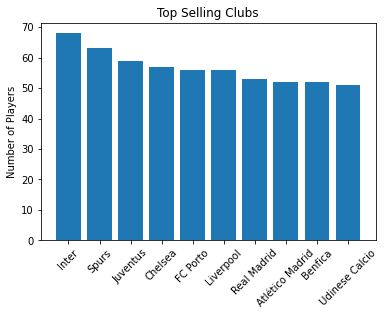

In [ ]:
#Visualization associated with top selling clubs
plt.bar(x = top_10_selling_clubs.head(10).index , height =top_10_selling_clubs['Team_from'].head(10))#X-axis with the top ten clubs
plt.xticks(rotation = 45)#Rotation of x-ticks
plt.ylabel('Number of Players')#Label of y-axis
plt.title('Top Selling Clubs')#Title of graph

Visualizing top buying clubs

Text(0.5, 1.0, 'Top Buying Clubs')

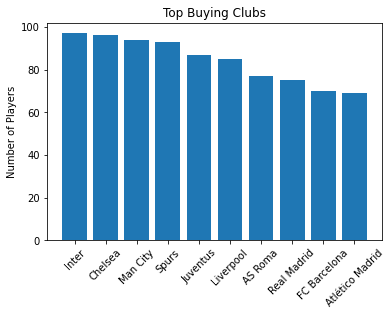

In [ ]:
#Visualization associated with top buying clubs
plt.bar(x = top_10_buying_clubs.head(10).index , height =top_10_buying_clubs['Team_to'].head(10))#X-axis with the top ten clubs
plt.xticks(rotation = 45)#X-tick rotation
plt.ylabel('Number of Players')#Labels for y-axis
plt.title('Top Buying Clubs')#Graph title

In general, FC Porto and Udinese Calcio are the top sellers, but aren't part of the top buyers.

Inter seems to have a lot of shuffling going on in the team as it tops both charts.

Top selling league

Text(0.5, 1.0, 'Top Selling Leagues')

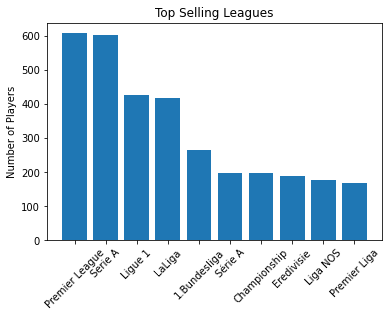

In [ ]:
#Visualization associated with top selling leagues
plt.bar(x = top_10_selling_leagues.head(10).index , height =top_10_selling_leagues['League_from'].head(10))#X-axis with the top leagues
plt.xticks(rotation = 45)#X-tick rotation
plt.ylabel('Number of Players')#Labels for y-axis
plt.title('Top Selling Leagues')#Graph title

Top buying league

Text(0.5, 1.0, 'Top Buying Leagues')

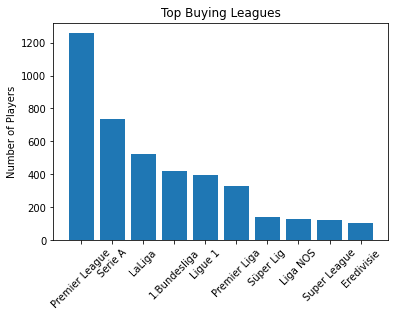

In [ ]:
#Visualization associated with top buying leagues
plt.bar(x = top_10_buying_leagues.head(10).index , height =top_10_buying_leagues['League_to'].head(10))#X-axis with top leagues
plt.xticks(rotation = 45)#X-tick rotation
plt.ylabel('Number of Players')#Label for y-axis
plt.title('Top Buying Leagues')#Graph title

In general, Eredivisie has more transfer out than more transfer in.

There is also a growth of more homegrown players in these leagues with each passing season.

The premier league has a lot of shuffling going on each season as they top the charts both in transfer out and transfer in.

Creating variables in terms of top teams and leagues in terms of transfer value.

In [ ]:
'''Write a program using the variable to sort the data for each category in ascending order'''
top_10_selling_clubs_value = df.groupby('Team_from',as_index = False)['Transfer_fee'].sum().sort_values(by = 'Transfer_fee',ascending = False)#Total groups in high selling club value
top_10_selling_leagues_value =  df.groupby('League_from',as_index = False)['Transfer_fee'].sum().sort_values(by = 'Transfer_fee',ascending = False)#Total groups in high selling league value
top_10_buying_clubs_value =  df.groupby('Team_to',as_index = False)['Transfer_fee'].sum().sort_values(by = 'Transfer_fee',ascending = False)#Total groups in hig buying club value
top_10_buying_leagues_value = df.groupby('League_to',as_index = False)['Transfer_fee'].sum().sort_values(by = 'Transfer_fee',ascending = False)#Total groups in high buying league value

Top clubs with selling value

Text(0.5, 1.0, 'Top Selling Clubs Based on Money')

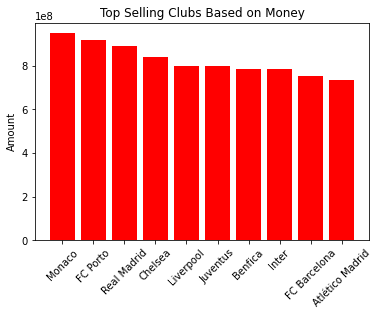

In [ ]:
##Visualization associated with top selling clubs value
plt.bar(x = top_10_selling_clubs_value['Team_from'].head(10) , height =top_10_selling_clubs_value['Transfer_fee'].head(10),color = 'red')
plt.xticks(rotation = 45)
plt.ylabel('Amount')
plt.title('Top Selling Clubs Based on Money')

Top clubs in buying value

Text(0.5, 1.0, 'Top Buying Clubs Based on Money')

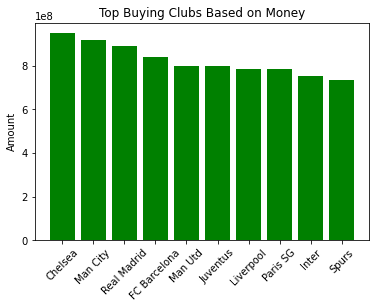

In [ ]:
#Visualization associated with top buying clubs value
plt.bar(x = top_10_buying_clubs_value['Team_to'].head(10) , height =top_10_selling_clubs_value['Transfer_fee'].head(10),color = 'green')
plt.xticks(rotation = 45)
plt.ylabel('Amount')
plt.title('Top Buying Clubs Based on Money')

Monaco sees more transfer outs as they top the league table more than the transfer ins as they are missing from top buyers.

Paris SG and Spurs are clearly buying more players as they are seen building their team.

Top leagues in selling value

Text(0.5, 1.0, 'Top Selling Leagues Clubs Based on Money')

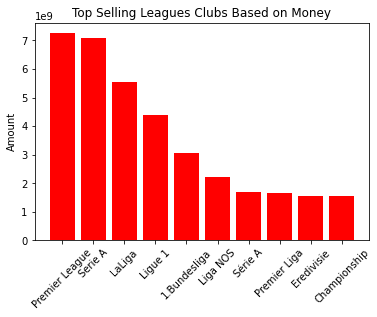

In [ ]:
#Visualization associated with top selling leagues value
plt.bar(x = top_10_selling_leagues_value['League_from'].head(10) , height =top_10_selling_leagues_value['Transfer_fee'].head(10),color = 'red')
plt.xticks(rotation = 45)
plt.ylabel('Amount')
plt.title('Top Selling Leagues Clubs Based on Money')

Top leagues in buying value

Text(0.5, 1.0, 'Top Buying Leagues Clubs Based on Money')

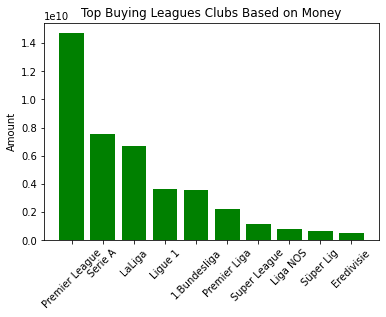

In [ ]:
#Visualization associated with top buying leagues value
plt.bar(x = top_10_buying_leagues_value['League_to'].head(10) , height =top_10_buying_leagues_value['Transfer_fee'].head(10),color = 'green')
plt.xticks(rotation = 45)
plt.ylabel('Amount')
plt.title('Top Buying Leagues Clubs Based on Money')

The premier league is most valuable as all transfers both in and out occurs there.

Serie A and LaLiga looses more than they gain.

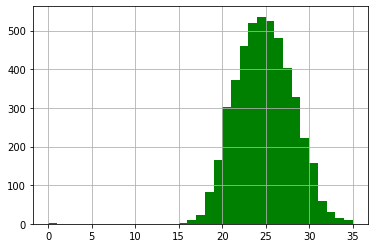

In [ ]:
'''Write a command using the variable created to visualize valuable players according to age and position played'''
df['Age'].hist(bins = 35,color = 'green')#Age of player

Age is a determinant of a player's value as it is seen that those within the age range of 20 - 30 are transferred the most with its peak between 23 -24 years.

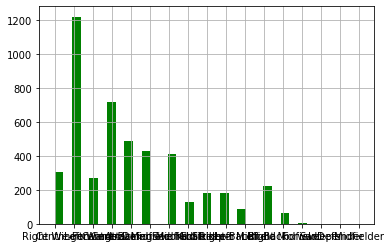

In [ ]:
df['Position'].hist(bins = 35,color = 'green')#Position of player

Center forward is the most sought for position in transfers.